In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
from matplotlib import pyplot as plt, cm as mpl_cm
from cycler import cycler

sc.set_figure_params(figsize=(4, 4))
sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)

In [2]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_h5")

In [3]:
sc.logging.print_header()

scanpy==1.9.3 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.0 statsmodels==0.13.5 python-igraph==0.10.4 louvain==0.8.0 pynndescent==0.5.8


In [4]:
import os
os.chdir("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_h5")

In [5]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [6]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr

import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

anndata2ri.activate()
%load_ext rpy2.ipython


In [8]:
path_data = "/data5/maolp/Gaofeng_All_matrix/Allcount/All_scanpyData/BCRTCR"
# path_bcr_input = f"{path_data}/Gao_All_BCR.csv"
path_tcr_input = f"{path_data}/Gao_All_TCR.csv"

path_tcr_csv = f"{path_data}/TCR_read_aligned.csv"
path_tcr_out = f"{path_data}/TCR_preprocessed.h5ad"

In [9]:
adata_tcr = ir.io.read_10x_vdj(path_tcr_csv)
print(f"Amount cells: {len(adata_tcr)}")

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scirpy/io/_convert_anndata.py:81: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(obs=ir_df, X=np.empty([ir_df.shape[0], 0]))


Amount cells: 78452


In [10]:
ir.pp.merge_with_ir(adata1, adata_tcr)

In [11]:
ir.tl.chain_qc(adata1)

# ir.tl.chain_qc(adata_tcr2)

In [12]:
adata1_IR = adata1[adata1.obs['chain_pairing'] != 'no IR']
ir.tl.chain_qc(adata1_IR)

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/scirpy/tl/_chain_qc.py:162: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[col_receptor_type] = res_receptor_type


In [36]:
import numpy as np
from typing import List, Optional

def filter_and_clean_adata(adata, column_name: str) -> Optional[List[str]]:
    """
    Filters an AnnData object to keep only rows where the specified column does not have empty strings.
    Replaces empty strings with NaN and drops rows with NaN in the specified column.
    
    Parameters:
        adata (AnnData): The AnnData object to be filtered.
        column_name (str): The name of the column to filter and clean.
    
    Returns:
        Optional[List[str]]: A list of cleaned non-NaN values from the specified column, if any.
    """
    # Create a mask where the specified column is not an empty string
    mask = adata.obs[column_name] != ''
    
    # Apply this mask to the entire AnnData object
    adata_filtered = adata[mask]
    
    # Replace empty strings with NaN in the specified column
    adata_filtered.obs[column_name].replace('', np.nan, inplace=True)
    
    # Drop NaN values in the specified column
    adata_filtered.obs.dropna(subset=[column_name], inplace=True)
    
    # Convert the cleaned column to a list if needed
    cleaned_list = adata_filtered.obs[column_name].tolist()
    
    return cleaned_list

In [ ]:
# adata1_IR2=adata1_IR
# # Create a mask where 'IR_VDJ_1_junction_aa' is not an empty string
# mask = adata1_IR2.obs['IR_VDJ_1_junction_aa'] != ''

# # Apply this mask to the entire AnnData object
# adata1_IR2 = adata1_IR2[mask]

# # Now, adata1_IR2 is properly filtered, and you can convert the cleaned data to a list if needed
# cleaned_list = adata1_IR2.obs['IR_VDJ_1_junction_aa'].tolist()
# # Replace empty strings with NaN
# adata1_IR2.obs['IR_VDJ_1_junction_aa'].replace('', np.nan, inplace=True)

# # Now you can drop NaN values in place if needed
# adata1_IR2.obs.dropna(subset=['IR_VDJ_1_junction_aa'], inplace=True)

# # If you need to convert to a list, handle NaN values accordingly
# cleaned_list = adata1_IR2.obs['IR_VDJ_1_junction_aa'].dropna().tolist()

In [39]:
c1=filter_and_clean_adata(adata1_IR ,'IR_VDJ_1_junction_aa')

In [50]:
adata1_IR.obs["Week"] = adata1_IR.obs["AdjustedID"].str[1:5].astype(float)

In [56]:
adata_Early=adata1_IR[adata1_IR.obs["Week"]<26]
adata_Early

View of AnnData object with n_obs × n_vars = 42185 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [124]:
adata1_IRall=adata1_IR[adata1_IR.obs['AdjustedID'].str.contains("B")]

In [123]:
adata1_IRB=adata1_IR[adata1_IR.obs['AdjustedID'].str.contains("B")]

In [53]:
adata_late=adata1_IR[adata1_IR.obs["Week"]>26]
adata_late

View of AnnData object with n_obs × n_vars = 28522 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

View of AnnData object with n_obs × n_vars = 53094 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2', 'is_cell', 'high_confidence', 'multi_chain', 'extra_chains', 'IR_VJ_1_c_call', 'IR_VJ_2_c_call', 'IR_VDJ_1_c_call', 'IR_VDJ_2_c_call', 'IR_VJ_1_consensus_count', 'IR_VJ_2_consensus_count', 'IR_VDJ_1_consensus_count', 'IR_VDJ_2_consensus_count', 'IR_VJ_1_d_call', 'IR_VJ_2_d_call', 'IR_VDJ_1_d_call', 'IR_VDJ_2_d_call', 'IR_VJ_1_duplicate_count', 'IR_VJ_2_duplicate_count', 'IR_VDJ_1_duplicate_count', 'IR_VDJ_2_duplicate_count', 'IR_VJ_1_j_call', 'IR_VJ_2_j_call', 'IR_VDJ_1_j_call', 'IR_VDJ_2_j_call', 'IR_VJ_1_junction', 'IR_VJ_2_junction', 'IR_VDJ_1_juncti

In [93]:
def remove_duplicates(lst):
    return list(set(lst))

def reorder_list(lst):
    max_string = max(lst)
    lst.remove(max_string)
    lst.insert(0, max_string) 
    return lst  

Seq_late_no_duplicates = remove_duplicates(Seq_late)


Seq_late_reordered = reorder_list(Seq_late_no_duplicates)


print(len(Seq_late_reordered))

27123


In [110]:
# Seq_late_no_duplicate

In [68]:
Seq_late=Seq_late[1:]
Seq_late

['CASSQGIAGLRTDTQYF',
 'CASSAHRQGLNSPLHF',
 'CASSVLFLAKNIQYF',
 'CAISRRRDTNQPQHF',
 'CASSWPGPHYEQYF',
 'CASSVGDRGLNTEAFF',
 'CASTPARGRHEQYF',
 'CASSLGAQETQYF',
 'CASSQDRSHNEKLFF',
 'CASSSTGNTEAFF',
 'CSEGREAFF',
 'CASSSADRVYEQYF',
 'CASSHPPPYNEQFF',
 'CASSPQGGNIQYF',
 'CASSILTSSYNEQFF',
 'CASSRTGDEQFF',
 'CASSRDRGRNEQFF',
 'CASSLRREAFF',
 'CASSLAGWGGYTF',
 'CASSPLAGVGDTQYF',
 'CASSLGNPGELFF',
 'CAISDGTGNEKLFF',
 'CASSERGGYEQYF',
 'CASSPGLAGHTDTQYF',
 'CASSEGTGGYGYTF',
 'CASRDRGGGTDTQYF',
 'CASSYNQPQHF',
 'CSATPTEGDFQETQYF',
 'CASSVGVFLPYEQYF',
 'CASTSRKGQGRNSPLHF',
 'CASSQAVLSRPQHF',
 'CASSLTSGSPTDTQYF',
 'CASSLWLGSYEQYF',
 'CASSLWKGGTEAFF',
 'CATAATGDTEAFF',
 'CAWSVRRAKNIQYF',
 'CASSTPWGEGPHEQFF',
 'CASSLDPRSTDTQYF',
 'CSARDLSKRSYEQYF',
 'CASSAGTSGRWGDTQYF',
 'CASSVGGTSAYNEQFF',
 'CASSLGPLEKLFF',
 'CASSPLQGLRTEAFF',
 'CASSIRTGPAETQYF',
 'CASSLFAKTEAFF',
 'CSARAPFQGAKNIQYF',
 'CASSLPLSSGGAGETQYF',
 'CASSQVNIQYF',
 'CSAAQGGKTEAFF',
 'CASRRADSGNTIYF',
 'CASSQDWQLHYGYTF',
 'CASSSKLAGGLYNE

In [16]:

# !pip install palmotif  -i https://pypi.tuna.tsinghua.edu.cn/simple
# !pip install weblogo  -i https://pypi.tuna.tsinghua.edu.cn/simple


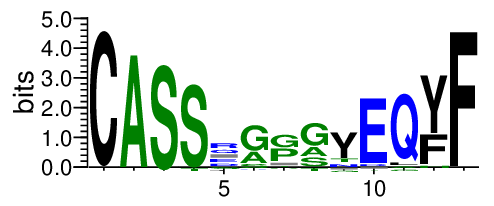

In [115]:


import numpy as np
import pandas as pd
import weblogo
from weblogo import ColorScheme, SymbolColor

import IPython.display

seqs = Seq_late_reordered

import palmotif

motif, s = palmotif.compute_pal_motif(seqs[0], seqs)

"""Weblogo3 does not support negative values!"""
# motif = motif * np.random.choice([-1, 1], size=motif.shape)

#fseqs = [s[:5] for s in seqs]
#logoseqs = weblogo.seq.SeqList(alist=fseqs, alphabet=weblogo.seq.Alphabet(''.join(motif.index)))
#logodata = weblogo.LogoData().from_seqs(logoseqs)

"""motif is a pd.DataFrame with logo positions across the columns,
a row index containing the alphabet symbols, and each value containing
an arbitrary float value for symbol height"""
alphabet = weblogo.seq.Alphabet(''.join(motif.index))
hydrophobicity = ColorScheme([SymbolColor("RKDENQ", "blue", "hydrophilic"),
                              SymbolColor("SGHTAP", "green", "neutral"),
                              SymbolColor("YVMCLFIW", "black", "hydrophobic"),
                              SymbolColor("-*ZX", "gray", "default")],
                             alphabet=alphabet)

logodata = weblogo.LogoData(length=motif.shape[1],
                            alphabet=alphabet,
                            entropy=motif.sum(axis=0),
                            weight=np.ones(motif.shape[1]),
                            counts=motif.values.T)

logooptions = weblogo.LogoOptions(  resolution=200,
                                    show_fineprint=False,
                                    yaxis_scale=1.1*np.max(motif.values),
                                    color_scheme=hydrophobicity,
                                    unit_name='nats',
                                    yaxis_label='bits')
logoformat = weblogo.LogoFormat(logodata, logooptions)
logobytes = weblogo.logo_formatter.png_formatter(logodata, logoformat)
IPython.display.Image(data=logobytes)



In [101]:
def process_sequence(seq):
    def remove_duplicates(lst):
        return list(set(lst))

    def reorder_list(lst):
        if not lst:
            return lst
        max_string = max(lst, default=None)
        if max_string is None:
            return lst
        lst.remove(max_string)
        lst.insert(0, max_string)
        return lst

    no_duplicates = remove_duplicates(seq)
    reordered_list = reorder_list(no_duplicates)

    return reordered_list

In [103]:
Seq_Early=filter_and_clean_adata(adata_Early ,'IR_VDJ_1_junction_aa')
Seq_Early2=process_sequence(Seq_Early)
len(Seq_Early2)

27813

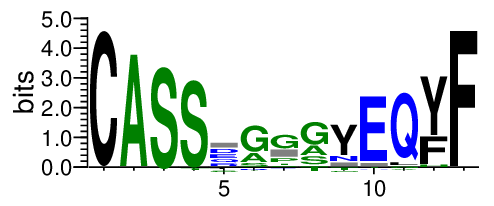

In [118]:


import numpy as np
import pandas as pd
import weblogo
from weblogo import ColorScheme, SymbolColor

import IPython.display

seqs =[Seq_late_reordered[0]]+Seq_Early2

import palmotif

motif, s = palmotif.compute_pal_motif(seqs[0], seqs)

"""Weblogo3 does not support negative values!"""
# motif = motif * np.random.choice([-1, 1], size=motif.shape)

#fseqs = [s[:5] for s in seqs]
#logoseqs = weblogo.seq.SeqList(alist=fseqs, alphabet=weblogo.seq.Alphabet(''.join(motif.index)))
#logodata = weblogo.LogoData().from_seqs(logoseqs)

"""motif is a pd.DataFrame with logo positions across the columns,
a row index containing the alphabet symbols, and each value containing
an arbitrary float value for symbol height"""
alphabet = weblogo.seq.Alphabet(''.join(motif.index))
hydrophobicity = ColorScheme([SymbolColor("RKDENQ", "blue", "hydrophilic"),
                              SymbolColor("SGHTAP", "green", "neutral"),
                              SymbolColor("YVMCLFIW", "black", "hydrophobic"),
                              SymbolColor("-*ZX", "gray", "default")],
                             alphabet=alphabet)

logodata = weblogo.LogoData(length=motif.shape[1],
                            alphabet=alphabet,
                            entropy=motif.sum(axis=0),
                            weight=np.ones(motif.shape[1]),
                            counts=motif.values.T)

logooptions = weblogo.LogoOptions(  resolution=200,
                                    show_fineprint=False,
                                    yaxis_scale=1.1*np.max(motif.values),
                                    color_scheme=hydrophobicity,
                                    unit_name='nats',
                                    yaxis_label='bits')
logoformat = weblogo.LogoFormat(logodata, logooptions)
logobytes = weblogo.logo_formatter.png_formatter(logodata, logoformat)
IPython.display.Image(data=logobytes)



In [127]:

BSeq_late=filter_and_clean_adata(adata1_IRB[adata1_IRB.obs["Week"]>26] ,'IR_VDJ_1_junction_aa')
BSeq_late2=process_sequence(BSeq_late)
len(BSeq_late2)

27123

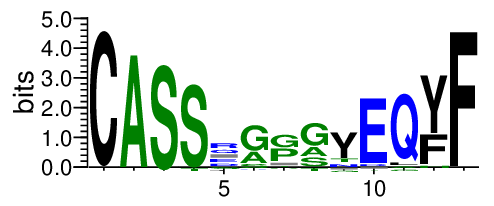

In [128]:


import numpy as np
import pandas as pd
import weblogo
from weblogo import ColorScheme, SymbolColor

import IPython.display

seqs =BSeq_late2

import palmotif

motif, s = palmotif.compute_pal_motif(seqs[0], seqs)

"""Weblogo3 does not support negative values!"""
# motif = motif * np.random.choice([-1, 1], size=motif.shape)

#fseqs = [s[:5] for s in seqs]
#logoseqs = weblogo.seq.SeqList(alist=fseqs, alphabet=weblogo.seq.Alphabet(''.join(motif.index)))
#logodata = weblogo.LogoData().from_seqs(logoseqs)

"""motif is a pd.DataFrame with logo positions across the columns,
a row index containing the alphabet symbols, and each value containing
an arbitrary float value for symbol height"""
alphabet = weblogo.seq.Alphabet(''.join(motif.index))
hydrophobicity = ColorScheme([SymbolColor("RKDENQ", "blue", "hydrophilic"),
                              SymbolColor("SGHTAP", "green", "neutral"),
                              SymbolColor("YVMCLFIW", "black", "hydrophobic"),
                              SymbolColor("-*ZX", "gray", "default")],
                             alphabet=alphabet)

logodata = weblogo.LogoData(length=motif.shape[1],
                            alphabet=alphabet,
                            entropy=motif.sum(axis=0),
                            weight=np.ones(motif.shape[1]),
                            counts=motif.values.T)

logooptions = weblogo.LogoOptions(  resolution=200,
                                    show_fineprint=False,
                                    yaxis_scale=1.1*np.max(motif.values),
                                    color_scheme=hydrophobicity,
                                    unit_name='nats',
                                    yaxis_label='bits')
logoformat = weblogo.LogoFormat(logodata, logooptions)
logobytes = weblogo.logo_formatter.png_formatter(logodata, logoformat)
IPython.display.Image(data=logobytes)



In [134]:
import numpy as np
import pandas as pd
import weblogo
from weblogo import ColorScheme, SymbolColor
from IPython.display import Image

def generate_weblogo(seqs):
    motif, s = palmotif.compute_pal_motif(seqs[0], seqs)

    # Define color scheme
    alphabet = weblogo.seq.Alphabet(''.join(motif.index))
    hydrophobicity = ColorScheme([SymbolColor("RKDENQ", "blue", "hydrophilic"),
                                  SymbolColor("SGHTAP", "green", "neutral"),
                                  SymbolColor("YVMCLFIW", "black", "hydrophobic"),
                                  SymbolColor("-*ZX", "gray", "default")],
                                 alphabet=alphabet)

    # Create LogoData
    logodata = weblogo.LogoData(length=motif.shape[1],
                                alphabet=alphabet,
                                entropy=motif.sum(axis=0),
                                weight=np.ones(motif.shape[1]),
                                counts=motif.values.T)

    # Define LogoOptions
    logooptions = weblogo.LogoOptions(resolution=200,
                                      show_fineprint=False,
                                      yaxis_scale=1.1*np.max(motif.values),
                                      color_scheme=hydrophobicity,
                                      unit_name='nats',
                                      yaxis_label='bits')
    
    # Create LogoFormat
    logoformat = weblogo.LogoFormat(logodata, logooptions)
    
    # Generate logo bytes
    logobytes = weblogo.logo_formatter.png_formatter(logodata, logoformat)
    
    return Image(data=logobytes)

# Example usage:
# seqs = ["ACTG", "ACCG", "AGTG"]
# generate_weblogo(seqs)


In [130]:

BSeq_Earl=filter_and_clean_adata(adata1_IRB[adata1_IRB.obs["Week"]<26] ,'IR_VDJ_1_junction_aa')
BSeq_late2=process_sequence(BSeq_late)
len(BSeq_late2)

27123

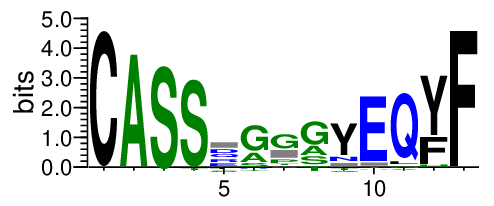

In [157]:

BSeq_Early=filter_and_clean_adata(adata1_IRB[adata1_IRB.obs["Week"]<26] ,'IR_VDJ_1_junction_aa')
BSeq_Early2=process_sequence(BSeq_Early)
generate_weblogo([BSeq_late2[0]]+BSeq_Early2)

In [158]:
def strings_to_dict(strings):
    length_dict = {}
    for string in strings:
        length = len(string)
        if length in length_dict:
            length_dict[length].append(string)
        else:
            length_dict[length] = [string]
    return length_dict



BSeq_lat_dict = strings_to_dict(BSeq_late2)
BSeq_ealry_dict = strings_to_dict(BSeq_Early2)
# print(result_dict)
# result_dict[13]

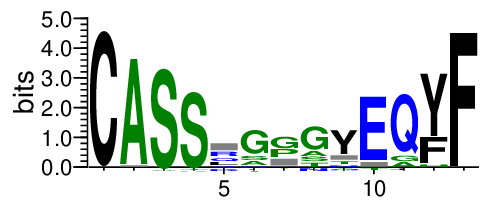

In [156]:
generate_weblogo(BSeq_lat_dict[13])

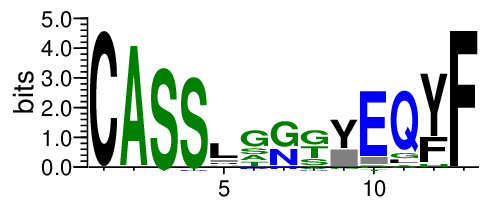

In [159]:
generate_weblogo(BSeq_ealry_dict[13])

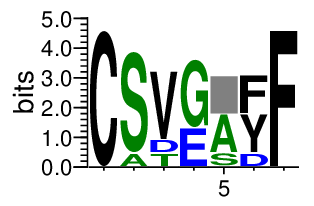

In [162]:
generate_weblogo(BSeq_ealry_dict[7])


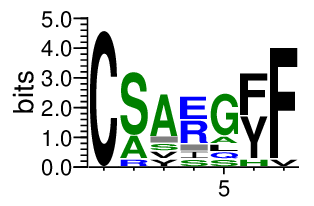

In [163]:
generate_weblogo(BSeq_lat_dict[7])

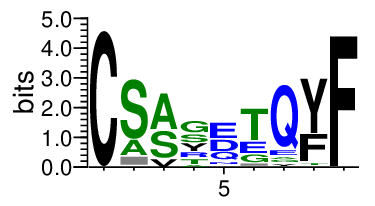

In [165]:
generate_weblogo(BSeq_ealry_dict[9])

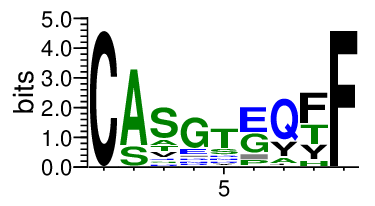

In [164]:
generate_weblogo(BSeq_lat_dict[9])

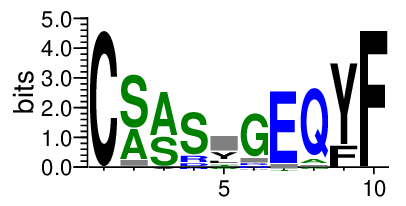

In [166]:
generate_weblogo(BSeq_ealry_dict[10])

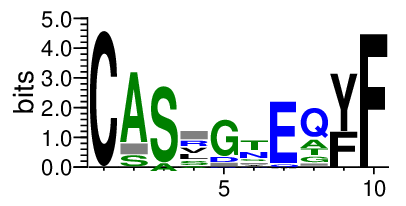

In [167]:
generate_weblogo(BSeq_lat_dict[10])

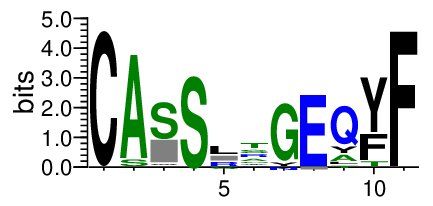

In [168]:
generate_weblogo(BSeq_ealry_dict[11])

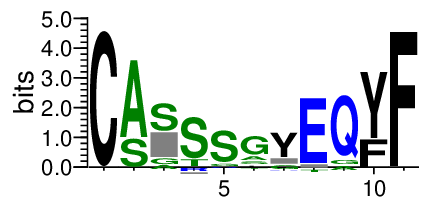

In [169]:
generate_weblogo(BSeq_lat_dict[11])

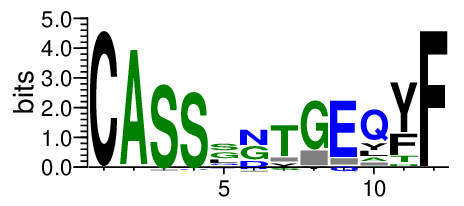

In [173]:
generate_weblogo(BSeq_ealry_dict[12])

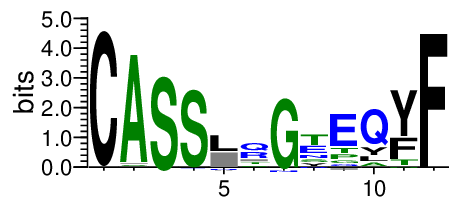

In [178]:
generate_weblogo(BSeq_lat_dict[12])

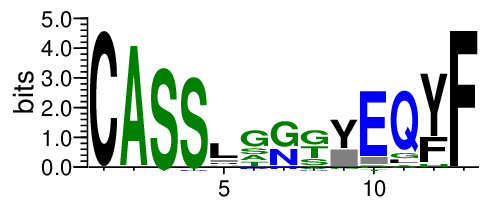

In [175]:
generate_weblogo(BSeq_ealry_dict[13])

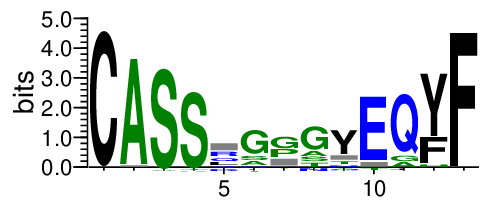

In [179]:
generate_weblogo(BSeq_lat_dict[13])

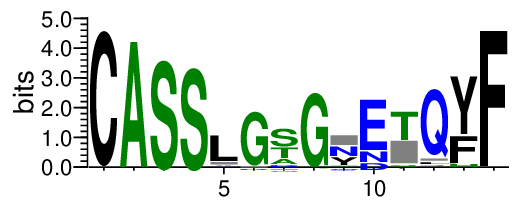

In [180]:
generate_weblogo(BSeq_ealry_dict[14])

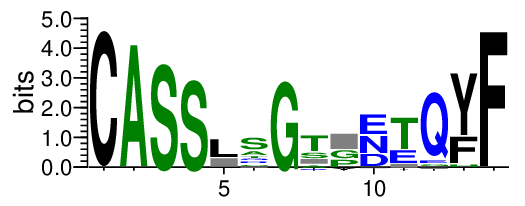

In [181]:
generate_weblogo(BSeq_lat_dict[14])

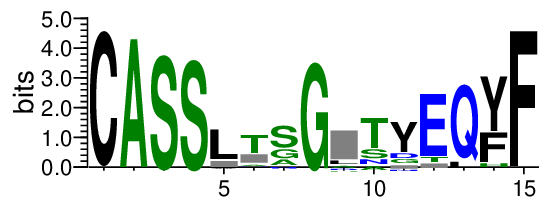

In [182]:
generate_weblogo(BSeq_ealry_dict[15])

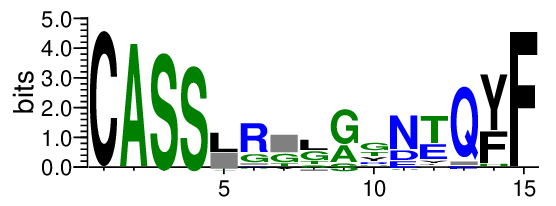

In [183]:
generate_weblogo(BSeq_lat_dict[15])

In [170]:
# # for i in result_dict.keys():
# #     print(i)
# generate_weblogo(result_dict[5])

In [171]:
# generate_weblogo(result_dict[14])

In [ ]:
# Seq_Early=filter_and_clean_adata(adata_Early ,'IR_VDJ_1_junction_aa')
# Seq_Early2=process_sequence(Seq_Early)
# len(Seq_Early2)